In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("original (4).csv",index_col=0)

In [3]:
data.head()

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
S001,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,0,1,1
S002,1,1,0,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,0,0
S003,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,1,1,1,0,0,0
S004,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
S005,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
item_diff = data.mean()
item_diff

Q01    0.771739
Q02    0.923913
Q03    0.706522
Q04    0.891304
Q05    0.967391
Q06    0.891304
Q07    0.869565
Q08    0.815217
Q09    0.923913
Q10    0.913043
Q11    0.793478
Q12    0.934783
Q13    0.989130
Q14    0.826087
Q15    0.467391
Q16    0.902174
Q17    0.967391
Q18    0.902174
Q19    0.728261
Q20    0.489130
Q21    0.934783
Q22    0.652174
Q23    0.847826
Q24    0.586957
Q25    0.891304
Q26    0.978261
Q27    0.630435
Q28    0.489130
Q29    0.521739
Q30    0.217391
Q31    0.630435
Q32    0.195652
Q33    0.391304
Q34    0.565217
Q35    0.706522
Q36    0.836957
Q37    0.739130
Q38    0.456522
Q39    0.923913
Q40    0.304348
Q41    0.673913
Q42    0.380435
Q43    0.673913
Q44    0.293478
Q45    0.641304
Q46    0.771739
Q47    0.717391
Q48    0.315217
Q49    0.358696
Q50    0.521739
dtype: float64

In [6]:
#for文で全ての点双列相関係数を求める

#計算結果を入れるリストを作る
R_pbi = []

#標準偏差は共通
SD = data.sum(axis=1).std()

for i in data.columns:
    p = len(data[data[i]==1])/len(data)
    q = len(data[data[i]==0])/len(data)
    X_p = data[data[i]==1].sum(axis=1).mean()
    X_q = data[data[i]==0].sum(axis=1).mean()
    r_pbi = (np.sqrt(p*q)*(X_p-X_q)/SD)
    R_pbi.append(r_pbi)

R_pbi

[0.3770882857174044,
 0.11584778471455313,
 0.36717567001180323,
 0.29750527763998935,
 0.3092439221232012,
 0.32545716238557665,
 0.2545156406910654,
 0.47015644494466674,
 0.2799179231649674,
 0.39012264543471387,
 0.3864848608190212,
 0.4237576115001312,
 0.14300642764606813,
 0.24031444816301228,
 0.08218398606777101,
 0.17393243841757552,
 0.25046201957085706,
 0.3027901453565112,
 0.40305203948714896,
 0.2872507722877091,
 0.3180480121020506,
 0.29846701933967207,
 0.3890234302844921,
 0.352779538903562,
 0.32545716238557665,
 0.19143013091875732,
 0.2550082790487697,
 0.43344900518019,
 0.38302053200367303,
 0.20909506749801246,
 0.34873596858236783,
 0.1561895494369879,
 0.2966995258654879,
 0.3294891800817365,
 0.5009206538848808,
 0.5079031092338697,
 0.27152906159398793,
 0.3705956878835097,
 0.2602295065509175,
 0.20568777949813022,
 0.39958976059218954,
 0.16393227750332204,
 0.3624711640912995,
 0.2518725410578702,
 0.3780987495130566,
 0.451712831743698,
 0.4504622014891

In [12]:
#ある項目を抜いた場合の信頼性係数

A = []

n_item = 49

for i in data.columns:
    data_x = data.drop(i,axis=1)
    item_var = sum(data_x.var())
    total_var = data_x.sum(axis=1).var()
    a = n_item/(n_item-1)*(1-(item_var/total_var))
    A.append(a)

A

[0.7986508232110959,
 0.804462095144043,
 0.7990318720911649,
 0.8008816574131195,
 0.801473702074128,
 0.8002429007942019,
 0.8019295277435987,
 0.7959382603258529,
 0.801346257193691,
 0.7990238152549387,
 0.7983727943607539,
 0.7988035364079206,
 0.8036624683666911,
 0.8025360383571285,
 0.8095019966569993,
 0.8035569714870802,
 0.8022252064384595,
 0.8007904691806926,
 0.797792980891157,
 0.8022235313124099,
 0.8007251489495139,
 0.8015587396144263,
 0.7984575809467824,
 0.7997293033306269,
 0.8002429007942019,
 0.8030747169019128,
 0.8031635323338951,
 0.7967005948742091,
 0.7986351468720023,
 0.8037564888654831,
 0.7998136889060455,
 0.8050746886159743,
 0.8017427056210753,
 0.8006188950526919,
 0.7943381702993202,
 0.7950557029206425,
 0.8021110484661126,
 0.7990984626063263,
 0.8017248877818994,
 0.804519444932888,
 0.7979257087948868,
 0.8063788703383946,
 0.7992463026166099,
 0.8029249587700026,
 0.7987306072856178,
 0.7962626556021086,
 0.7961512942137201,
 0.804969861418958

In [14]:
item_property = pd.DataFrame({"difficulty":item_diff,"discrimination":R_pbi,"alpha_if_dropped":A},index=data.columns)
item_property

,difficulty,discrimination,alpha_if_dropped
Q01,0.771739,0.377088,0.798651
Q02,0.923913,0.115848,0.804462
Q03,0.706522,0.367176,0.799032
Q04,0.891304,0.297505,0.800882
Q05,0.967391,0.309244,0.801474
Q06,0.891304,0.325457,0.800243
Q07,0.869565,0.254516,0.801930
Q08,0.815217,0.470156,0.795938
Q09,0.923913,0.279918,0.801346
Q10,0.913043,0.390123,0.799024


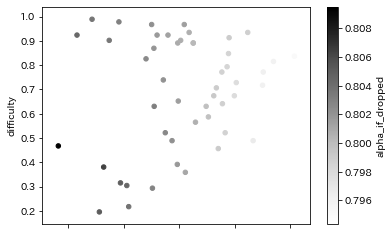

In [15]:
item_property.plot(kind="scatter",x="discrimination",y="difficulty",c="alpha_if_dropped")